# 2. Segunda base de datos. PAMAP 2

## 2.1. Cargar datos

In [5]:
import pandas as pd
import os

In [7]:
pd.set_option("display.float_format", "{:.3f}".format)

In [9]:
from abc import ABC, abstractmethod

class AbstractDataLoader(ABC):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        self.src_path = src_path
        self.keys = keys
        self.file_extension = file_extension
        self.delimiter = delimiter     
        
    @abstractmethod
    def load_data(self):
        pass

    @abstractmethod
    def _is_valid_extension(self, file):
        pass

In [11]:
class DataLoader(AbstractDataLoader):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        super().__init__(src_path, keys, file_extension, delimiter)
        
    
    def load_data(self):
        dataframes = []
        for file in os.listdir(self.src_path):
            if self._is_valid_extension(file):  
                df = pd.read_csv(os.path.join(self.src_path, file), delimiter=self.delimiter, names=self.keys)
                df['subject_id'] = self._get_subject_id(file)
                dataframes.append(df)
        final_df = pd.concat(dataframes, ignore_index=True)
        return final_df

                
    def _is_valid_extension(self, file):
        return file.endswith(self.file_extension)

    def _get_subject_id(self, file):
        return file.split('.')[0]

In [13]:
src = "datasets/2_PAMAP2/PAMAP2_Dataset/Protocol/"
keys = [
    "timestamp",
    "activityID",
    "heart_rate_bpm",
    # IMU Hand (columns 4–20)
    "IMU_Hand_temperature",
    "IMU_Hand_acceleration_16g_x",
    "IMU_Hand_acceleration_16g_y",
    "IMU_Hand_acceleration_16g_z",
    "IMU_Hand_acceleration_6g_x",
    "IMU_Hand_acceleration_6g_y",
    "IMU_Hand_acceleration_6g_z",
    "IMU_Hand_gyroscope_x",
    "IMU_Hand_gyroscope_y",
    "IMU_Hand_gyroscope_z",
    "IMU_Hand_magnetometer_x",
    "IMU_Hand_magnetometer_y",
    "IMU_Hand_magnetometer_z",
    "IMU_Hand_orientation_1",
    "IMU_Hand_orientation_2",
    "IMU_Hand_orientation_3",
    "IMU_Hand_orientation_4",
    # IMU Chest (columns 21–37)
    "IMU_Chest_temperature",
    "IMU_Chest_acceleration_16g_x",
    "IMU_Chest_acceleration_16g_y",
    "IMU_Chest_acceleration_16g_z",
    "IMU_Chest_acceleration_6g_x",
    "IMU_Chest_acceleration_6g_y",
    "IMU_Chest_acceleration_6g_z",
    "IMU_Chest_gyroscope_x",
    "IMU_Chest_gyroscope_y",
    "IMU_Chest_gyroscope_z",
    "IMU_Chest_magnetometer_x",
    "IMU_Chest_magnetometer_y",
    "IMU_Chest_magnetometer_z",
    "IMU_Chest_orientation_1",
    "IMU_Chest_orientation_2",
    "IMU_Chest_orientation_3",
    "IMU_Chest_orientation_4",
    # IMU Ankle (columns 38–54)
    "IMU_Ankle_temperature",
    "IMU_Ankle_acceleration_16g_x",
    "IMU_Ankle_acceleration_16g_y",
    "IMU_Ankle_acceleration_16g_z",
    "IMU_Ankle_acceleration_6g_x",
    "IMU_Ankle_acceleration_6g_y",
    "IMU_Ankle_acceleration_6g_z",
    "IMU_Ankle_gyroscope_x",
    "IMU_Ankle_gyroscope_y",
    "IMU_Ankle_gyroscope_z",
    "IMU_Ankle_magnetometer_x",
    "IMU_Ankle_magnetometer_y",
    "IMU_Ankle_magnetometer_z",
    "IMU_Ankle_orientation_1",
    "IMU_Ankle_orientation_2",
    "IMU_Ankle_orientation_3",
    "IMU_Ankle_orientation_4"
]

file_extension = '.dat'
delimiter = r'\s+'
data_loader_pamap = DataLoader(src, keys, file_extension, delimiter)
pamap_data = data_loader_pamap.load_data()

pamap_data.shape

(2872533, 55)

## 2.2. Dimensiones y primeras 5 filas

In [15]:
pamap_data.shape

(2872533, 55)

Podemos observar que el dataset consta de:

1. **Características**: 55
2. **Ejemplos**: 2,872,533

In [17]:
pamap_data.head()

timestamp  activityID  heart_rate_bpm  IMU_Hand_temperature  \
0      8.380           0         104.000                30.000   
1      8.390           0             NaN                30.000   
2      8.400           0             NaN                30.000   
3      8.410           0             NaN                30.000   
4      8.420           0             NaN                30.000   

   IMU_Hand_acceleration_16g_x  IMU_Hand_acceleration_16g_y  \
0                        2.372                        8.601   
1                        2.188                        8.566   
2                        2.374                        8.601   
3                        2.075                        8.529   
4                        2.229                        8.831   

   IMU_Hand_acceleration_16g_z  IMU_Hand_acceleration_6g_x  \
0                        3.510                       2.440   
1                        3.662                       2.395   
2                        3.549                       2.305   
3                        3.660                       2.335   
4                        3.700                       2.231   

   IMU_Hand_acceleration_6g_y  IMU_Hand_acceleration_6g_z  ...  \
0                       8.762                       3.355  ...   
1                       8.551                       3.642  ...   
2                       8.536                       3.733  ...   
3                       8.536                       3.733  ...   
4                       8.597                       3.763  ...   

   IMU_Ankle_gyroscope_y  IMU_Ankle_gyroscope_z  IMU_Ankle_magnetometer_x  \
0                  0.009                 -0.018                   -61.189   
1                 -0.005                  0.000                   -59.848   
2                  0.000                  0.022                   -60.736   
3                 -0.020                  0.011                   -60.409   
4                 -0.014                 -0.003                   -61.520   

   IMU_Ankle_magnetometer_y  IMU_Ankle_magnetometer_z  \
0                   -38.960                   -58.144   
1                   -38.892                   -58.525   
2                   -39.414                   -58.400   
3                   -38.764                   -58.396   
4                   -39.388                   -58.269   

   IMU_Ankle_orientation_1  IMU_Ankle_orientation_2  IMU_Ankle_orientation_3  \
0                    1.000                    0.000                    0.000   
1                    1.000                    0.000                    0.000   
2                    1.000                    0.000                    0.000   
3                    1.000                    0.000                    0.000   
4                    1.000                    0.000                    0.000   

   IMU_Ankle_orientation_4  subject_id  
0                    0.000  subject101  
1                    0.000  subject101  
2                    0.000  subject101  
3                    0.000  subject101  
4                    0.000  subject101  

[5 rows x 55 columns]

## 2.3. Identifica y elimina los datos ausentes

In [19]:
pamap_data.isnull().sum()

timestamp                             0
activityID                            0
heart_rate_bpm                  2610265
IMU_Hand_temperature              13141
IMU_Hand_acceleration_16g_x       13141
IMU_Hand_acceleration_16g_y       13141
IMU_Hand_acceleration_16g_z       13141
IMU_Hand_acceleration_6g_x        13141
IMU_Hand_acceleration_6g_y        13141
IMU_Hand_acceleration_6g_z        13141
IMU_Hand_gyroscope_x              13141
IMU_Hand_gyroscope_y              13141
IMU_Hand_gyroscope_z              13141
IMU_Hand_magnetometer_x           13141
IMU_Hand_magnetometer_y           13141
IMU_Hand_magnetometer_z           13141
IMU_Hand_orientation_1            13141
IMU_Hand_orientation_2            13141
IMU_Hand_orientation_3            13141
IMU_Hand_orientation_4            13141
IMU_Chest_temperature              3563
IMU_Chest_acceleration_16g_x       3563
IMU_Chest_acceleration_16g_y       3563
IMU_Chest_acceleration_16g_z       3563
IMU_Chest_acceleration_6g_x        3563


Vemos que la cantidad de valores faltantes varía, pero no de sensor a sensor, sino que hay grupos de sensores que tienen la misma cantidad de faltantes. Vemos que depende de la posicíon del cuerpo en la cual esté el sensor:

- **Heart rate**: 2,610,265
- **Mano**: 13,141
- **Pecho**: 3,563
- **Tobillo**: 11,749

<BarContainer object of 4 artists>

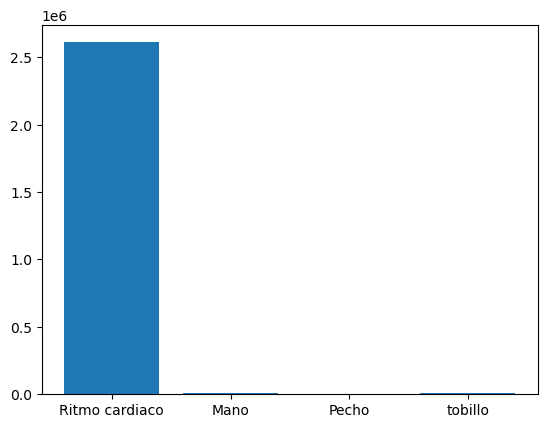

In [21]:
import matplotlib.pyplot as plt

# Datos
x = ["Ritmo cardiaco", "Mano", "Pecho", "tobillo"]
y = [2610265, 13141, 3563, 11749]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y)
# plt.show() 

Esto significa que tenemos muchos más valores faltantes en el monitor de ritmo cardíaco que en los demás, puesto que en este tenemos millones de vacíos. Mientras que en las manos y tobillo solo tenemos decenas de miles, y en el pecho solo unos cuantos miles. 

Si la proporción de valores faltantes en el heart rate monitor es demasiado alta, podríamos tener que eliminar la característica porque, si los reemplazamos, terminaremos muchas veces con el mismo valor (e.g. la media)

In [23]:
import pandas as pd

clases = ["Ritmo cardiaco", "Mano", "Pecho", "tobillo"]
faltantes = [2610265, 13141, 3563, 11749]
total = 2872533

ratios = [cantidad / total for cantidad in faltantes]
porcentajes = [ratio * 100 for ratio in ratios]

porcentaje_faltantes_por_clase = pd.DataFrame({
    'clase': clases,
    'cantidad de faltantes': faltantes,
    'ratio de faltantes': ratios,
    'porcentaje de faltantes': porcentajes
})

porcentaje_faltantes_por_clase

clase  cantidad de faltantes  ratio de faltantes  \
0  Ritmo cardiaco                2610265               0.909   
1            Mano                  13141               0.005   
2           Pecho                   3563               0.001   
3         tobillo                  11749               0.004   

   porcentaje de faltantes  
0                   90.870  
1                    0.457  
2                    0.124  
3                    0.409

Podemos observar que 90% de los valores de ritmo cardíaco están vacíos, mentras que para la mano, el pecho y el tobillo, menos de un 1% de los valores son vacíos. Esto indica que, es posible, que un error haya ocurrido con el monitor de ritmo cardíaco o que la frecuencia de muestreo sea mucho menor. 

Si la frecuencia de muestro es menor, podríamos aplicar técnicas como el **forward propagation** o **interpolation**.

### 2.3.1. Heart rate monitor

Para determinar esto, nos vamos a la documentación. 

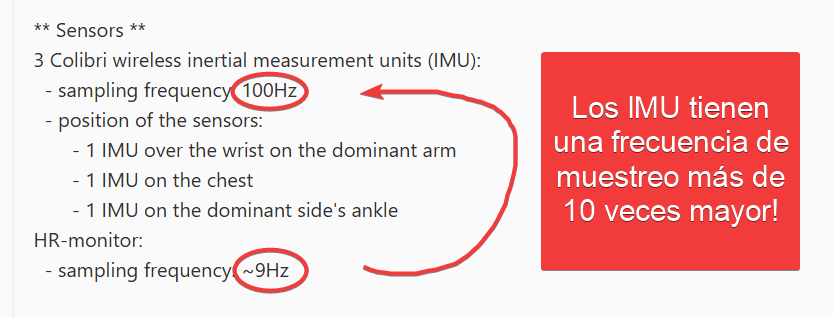


En ella notamos que el heart rate monitor tiene una frecuencia de muestreo de tan solo 9htz, mientras que los IMU tienen una de 100htz. Esto explica la razón detrás de que haya tantos valores faltantes: está tomando 10 veces menos mediciones. Esto es interesante porque significa que podríamos aplicar una de las técnicas mencionadas anteriormente (f. prop., interpolation, o convolution), en lugar de eliminar la columna entera.

Entonces podemos observar la curva de las mediciones del sensor:

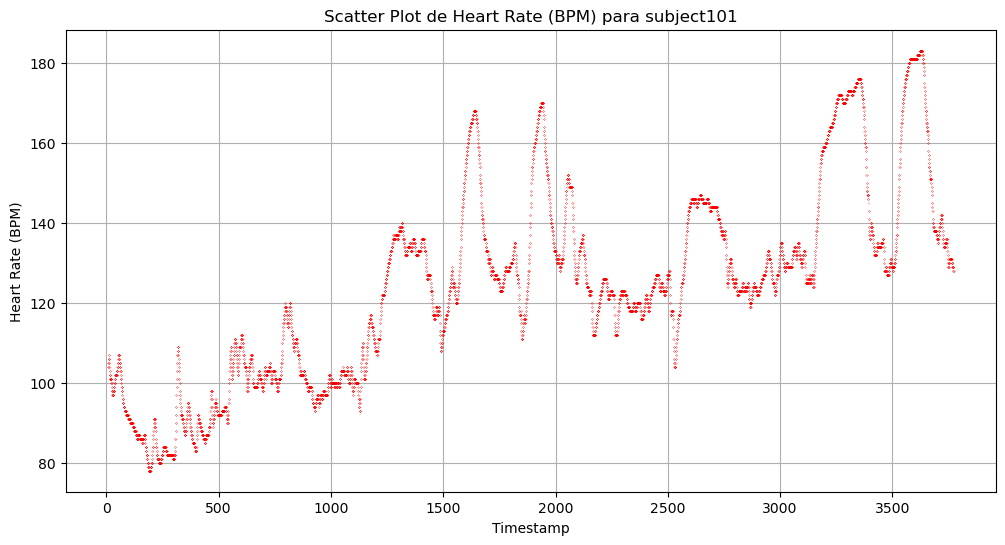

In [33]:
# Filtrar el DataFrame para subject101
subject101_data = pamap_data[pamap_data["subject_id"] == "subject101"]

# Extraer timestamp y heart_rate_bpm
timestamps = subject101_data["timestamp"]
heart_rate = subject101_data["heart_rate_bpm"]

plt.figure(figsize=(12, 6))
# Disminuimos el tamaño de cada punto con markersize=3 (ajusta el valor según necesites)
plt.plot(timestamps, heart_rate, marker='.', linestyle='None', color='red', markersize=0.1)
plt.title("Scatter Plot de Heart Rate (BPM) para subject101")
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate (BPM)")
plt.grid(True)
plt.show()


Observando la curva de heart rate monitor para un sujeto, notamos que los valores faltantes parecen ser aleatorios y también que están en medio de valores existentes. 

Entonces, si queremos usar una técnica como f.fill, tenemos que revisar de qué tamaño son los huecos: si los huecos son muy grandes, forward fill nos dará línes rectas horizontales las cuales no representan la verdadera naturaleza de la serie de tiempo

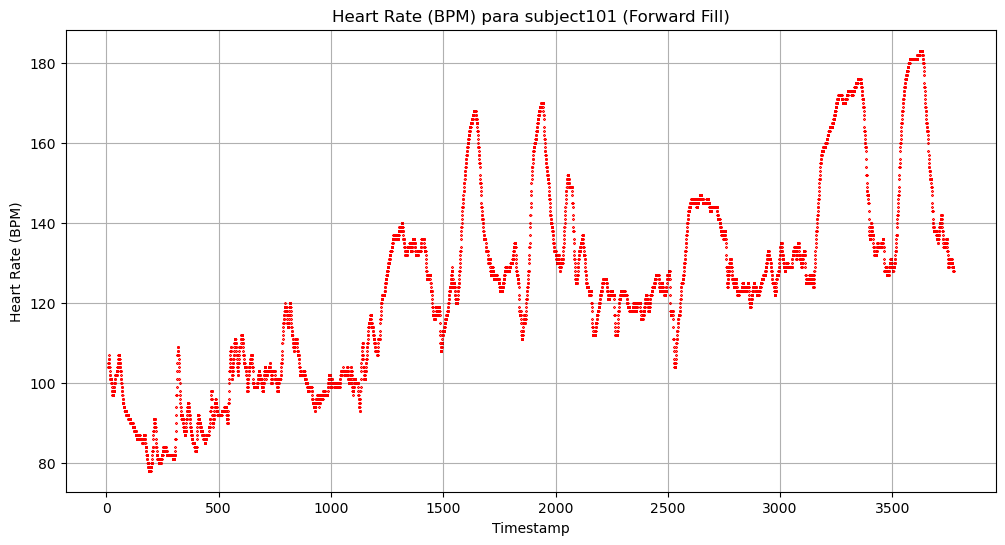

In [38]:
# Aseguramos una copia para evitar advertencias de pandas
subject101_data = pamap_data[pamap_data["subject_id"] == "subject101"].copy()

# Aplicar forward fill a la columna de heart_rate_bpm
subject101_data["heart_rate_bpm"] = subject101_data["heart_rate_bpm"].ffill()

# Crear un scatter plot usando .plot() con forward fill aplicado
plt.figure(figsize=(12, 6))
plt.plot(subject101_data["timestamp"], subject101_data["heart_rate_bpm"],
         marker='.', linestyle='None', color='red', markersize=0.1)
plt.title("Heart Rate (BPM) para subject101 (Forward Fill)")
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate (BPM)")
plt.grid(True)
plt.show()

Forard fill nos permite preservar la estructura de las curvas. Esto preserva de mejor manera las características de la curva.

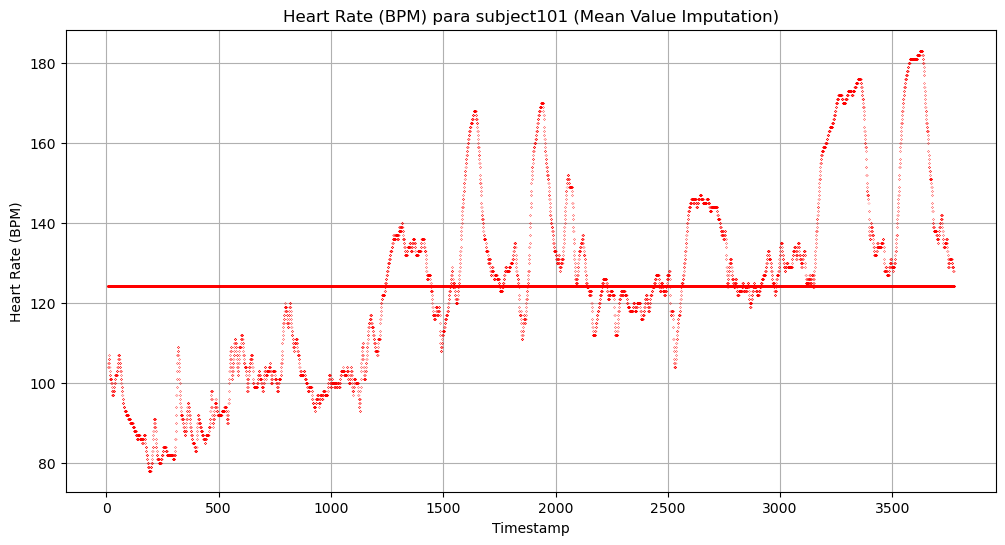

In [42]:
# Aseguramos una copia para evitar advertencias de pandas
subject101_data = pamap_data[pamap_data["subject_id"] == "subject101"].copy()

# Aplicar imputación por la media a la columna de heart_rate_bpm
subject101_data["heart_rate_bpm"] = subject101_data["heart_rate_bpm"].fillna(subject101_data["heart_rate_bpm"].mean())

# Crear un scatter plot usando .plot() con imputación por la media aplicada
plt.figure(figsize=(12, 6))
plt.plot(subject101_data["timestamp"], subject101_data["heart_rate_bpm"],
         marker='.', linestyle='None', color='red', markersize=0.1)
plt.title("Heart Rate (BPM) para subject101 (Mean Value Imputation)")
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate (BPM)")
plt.grid(True)
plt.show()

En cambio, mean value imputation en este contexto altera la curva geenrando una línea horizontal que no es propia del fenómeno que se intenta modelar. Esto puede dificultar la extracción de características como (por decir una) area bajo la curva, porque en algunas secciones el área será muy diferente a la que debería (por ejemplo en todo el intervalo [0, 1000] el valor es mucho mayor al que debería ser. 

Por todo lo mencionado anteriormente, se decide como la técnica a utilizar para tratar los valores faltantes del sensor Heart Rate Monitor como imputación con Fill Forward. A continuación se realiza el cambio para todos los ejemplos. 

En este dataset se presenta la siguiente situación: a pesar de que el forward fill arregla la mayoría de valores faltantes, también existen mediciones de personas las cuales inician con valores faltantes. Cuando esto ocurre, el forward fill no puede solucionarlo porque el primer valor es nulo y forward fill no propaga nulos. Para solucionar esto podemos aplicar backward fill después de aplicar forward fill, de esta manera obtendremos la aproximación más exacta posible.

In [49]:
deep_copy_pamap = pamap_data.copy()

deep_copy_pamap["heart_rate_bpm"] = (
    deep_copy_pamap.groupby("subject_id")["heart_rate_bpm"]
    .ffill()
    .bfill()
)

pamap_no_null = deep_copy_pamap.copy()

pamap_no_null.shape

(2872533, 55)

In [53]:
pamap_no_null.isnull().sum()

timestamp                           0
activityID                          0
heart_rate_bpm                      0
IMU_Hand_temperature            13141
IMU_Hand_acceleration_16g_x     13141
IMU_Hand_acceleration_16g_y     13141
IMU_Hand_acceleration_16g_z     13141
IMU_Hand_acceleration_6g_x      13141
IMU_Hand_acceleration_6g_y      13141
IMU_Hand_acceleration_6g_z      13141
IMU_Hand_gyroscope_x            13141
IMU_Hand_gyroscope_y            13141
IMU_Hand_gyroscope_z            13141
IMU_Hand_magnetometer_x         13141
IMU_Hand_magnetometer_y         13141
IMU_Hand_magnetometer_z         13141
IMU_Hand_orientation_1          13141
IMU_Hand_orientation_2          13141
IMU_Hand_orientation_3          13141
IMU_Hand_orientation_4          13141
IMU_Chest_temperature            3563
IMU_Chest_acceleration_16g_x     3563
IMU_Chest_acceleration_16g_y     3563
IMU_Chest_acceleration_16g_z     3563
IMU_Chest_acceleration_6g_x      3563
IMU_Chest_acceleration_6g_y      3563
IMU_Chest_ac

### 2.3.1. Mano, pecho y tobillo

De nuevo, observando la tabla de porcentaje de valores faltantes, notamos que los valores faltantes para la mano, pecho y tobillo, en conjunto no suman ni un 1% de los ejemplos. Es por esto que decidimos eliminar las filas con estos valores, ya que eliminarlas no representa una gran perdidad de información.

En este caso los sensores tienen valores faltantes en los mismos ejemplos, por lo que podemos eliminar la fila en la que cualquier columna tenga valores faltantes y eliminará todos los faltantes de dicho sensor.

In [55]:
pamap_no_null.dropna(subset=["IMU_Hand_temperature","IMU_Chest_temperature", "IMU_Ankle_acceleration_6g_x"], inplace=True)

In [57]:
pamap_no_null.isnull().sum()

timestamp                       0
activityID                      0
heart_rate_bpm                  0
IMU_Hand_temperature            0
IMU_Hand_acceleration_16g_x     0
IMU_Hand_acceleration_16g_y     0
IMU_Hand_acceleration_16g_z     0
IMU_Hand_acceleration_6g_x      0
IMU_Hand_acceleration_6g_y      0
IMU_Hand_acceleration_6g_z      0
IMU_Hand_gyroscope_x            0
IMU_Hand_gyroscope_y            0
IMU_Hand_gyroscope_z            0
IMU_Hand_magnetometer_x         0
IMU_Hand_magnetometer_y         0
IMU_Hand_magnetometer_z         0
IMU_Hand_orientation_1          0
IMU_Hand_orientation_2          0
IMU_Hand_orientation_3          0
IMU_Hand_orientation_4          0
IMU_Chest_temperature           0
IMU_Chest_acceleration_16g_x    0
IMU_Chest_acceleration_16g_y    0
IMU_Chest_acceleration_16g_z    0
IMU_Chest_acceleration_6g_x     0
IMU_Chest_acceleration_6g_y     0
IMU_Chest_acceleration_6g_z     0
IMU_Chest_gyroscope_x           0
IMU_Chest_gyroscope_y           0
IMU_Chest_gyro

## 2.4. Tipos de datos de cada atributo

In [62]:
pamap_no_null.dtypes

timestamp                       float64
activityID                        int64
heart_rate_bpm                  float64
IMU_Hand_temperature            float64
IMU_Hand_acceleration_16g_x     float64
IMU_Hand_acceleration_16g_y     float64
IMU_Hand_acceleration_16g_z     float64
IMU_Hand_acceleration_6g_x      float64
IMU_Hand_acceleration_6g_y      float64
IMU_Hand_acceleration_6g_z      float64
IMU_Hand_gyroscope_x            float64
IMU_Hand_gyroscope_y            float64
IMU_Hand_gyroscope_z            float64
IMU_Hand_magnetometer_x         float64
IMU_Hand_magnetometer_y         float64
IMU_Hand_magnetometer_z         float64
IMU_Hand_orientation_1          float64
IMU_Hand_orientation_2          float64
IMU_Hand_orientation_3          float64
IMU_Hand_orientation_4          float64
IMU_Chest_temperature           float64
IMU_Chest_acceleration_16g_x    float64
IMU_Chest_acceleration_16g_y    float64
IMU_Chest_acceleration_16g_z    float64
IMU_Chest_acceleration_6g_x     float64


Observamos que todas las características son de tipo flotante excepto de "subject_id", la cual es una string y que en pandas se representa con el tipo object, y el "activityID" que es un entero.

## 2.5. Resumen estadístico

In [66]:
pamap_no_null.describe()

timestamp  activityID  heart_rate_bpm  IMU_Hand_temperature  \
count 2844868.000 2844868.000     2844868.000           2844868.000   
mean     1826.475       5.466         109.755                32.656   
std      1104.290       6.334          25.853                 1.843   
min         5.640       0.000          57.000                24.750   
25%       887.120       0.000          90.000                31.438   
50%      1778.450       3.000         108.000                33.125   
75%      2702.210       7.000         125.000                34.000   
max      4475.630      24.000         202.000                35.500   

       IMU_Hand_acceleration_16g_x  IMU_Hand_acceleration_16g_y  \
count                  2844868.000                  2844868.000   
mean                        -4.958                        3.590   
std                          5.984                        6.268   
min                       -145.367                     -104.301   
25%                         -9.028                        1.298   
50%                         -5.785                        3.573   
75%                         -0.780                        6.603   
max                         62.860                      155.699   

       IMU_Hand_acceleration_16g_z  IMU_Hand_acceleration_6g_x  \
count                  2844868.000                 2844868.000   
mean                         3.173                      -4.887   
std                          3.842                       5.992   
min                       -101.452                     -61.489   
25%                          0.970                      -8.932   
50%                          2.963                      -5.734   
75%                          6.011                      -0.722   
max                        157.760                      52.821   

       IMU_Hand_acceleration_6g_y  IMU_Hand_acceleration_6g_z  ...  \
count                 2844868.000                 2844868.000  ...   
mean                        3.586                       3.354  ...   
std                         6.046                       3.839  ...   
min                       -61.868                     -61.935  ...   
25%                         1.291                       1.169  ...   
50%                         3.615                       3.137  ...   
75%                         6.602                       6.261  ...   
max                        62.260                      61.945  ...   

       IMU_Ankle_gyroscope_x  IMU_Ankle_gyroscope_y  IMU_Ankle_gyroscope_z  \
count            2844868.000            2844868.000            2844868.000   
mean                   0.007                 -0.033                  0.004   
std                    1.069                  0.593                  1.827   
min                  -23.995                -18.127                -14.020   
25%                   -0.151                 -0.081                 -0.304   
50%                    0.004                 -0.004                 -0.002   
75%                    0.093                  0.083                  0.062   
max                   16.443                 13.588                 16.529   

       IMU_Ankle_magnetometer_x  IMU_Ankle_magnetometer_y  \
count               2844868.000               2844868.000   
mean                    -32.702                     1.571   
std                      18.900                    21.609   
min                    -172.865                  -137.908   
25%                     -42.901                   -11.493   
50%                     -33.868                     1.329   
75%                     -18.996                    17.297   
max                      97.525                   123.306   

       IMU_Ankle_magnetometer_z  IMU_Ankle_orientation_1  \
count               2844868.000              2844868.000   
mean                     16.884                    0.399   
std                      20.334                    0.304   
min                    -109.289              

## 2.6. Distribución de clases

In [70]:
class_distribution_pamap = pamap_no_null['activityID'].value_counts()
class_distribution_pamap

activityID
0     923437
17    237902
4     229709
1     192290
3     188984
2     184645
7     184444
16    174976
6     163302
12    117094
13    104865
5      95641
24     47579
Name: count, dtype: int64

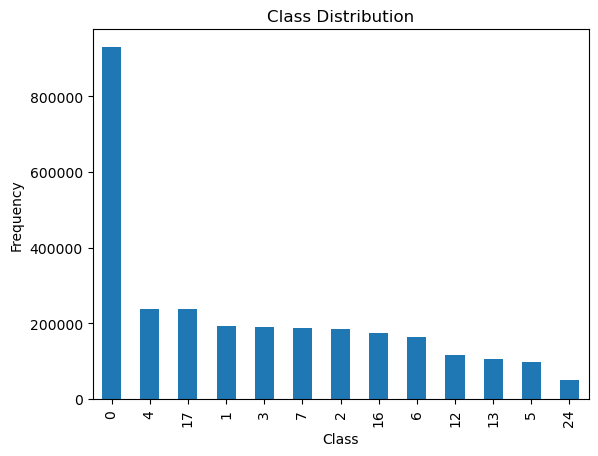

In [72]:
import matplotlib.pyplot as plt

class_distribution_pamap = pamap_data['activityID'].value_counts()
class_distribution_pamap.plot(kind='bar') 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

Observamos que existe un imbalance de clases

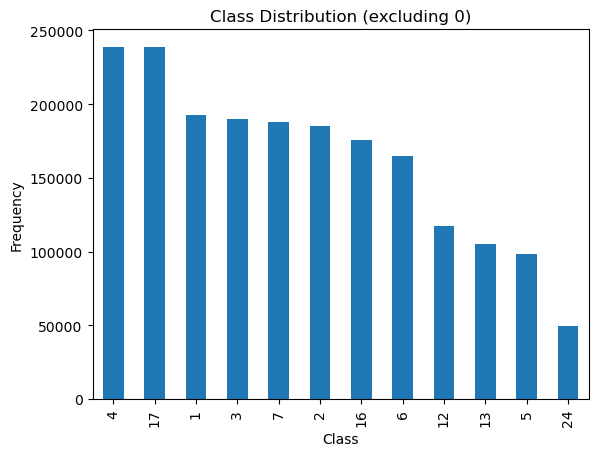

In [74]:
import matplotlib.pyplot as plt

# Filter out rows where 'activityID' is 0, then count the remaining classes
pamap_filtered_counts = pamap_data[pamap_data['activityID'] != 0]['activityID'].value_counts()

# Plot the resulting distribution
pamap_filtered_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution (excluding 0)')
plt.show()

Notamos un imbalance de clases en donde la clase menor es la clase 24. Tiene casi 4 veces menos que la clase 4. Por esto tenemos que usar métricas como Macro Average para ver la clasificación general y F1-score para la clasificación por nivel.

## 2.7. Correlación entre atributos

In [78]:
import pandas as pd

pamap_filtered = pamap_no_null.drop(columns=['activityID'], errors='ignore')
pamap_nmeric = pamap_filtered.select_dtypes(include=['number'])

pamap_corr_matrix = pamap_nmeric.corr(method='pearson')
pamap_corr_matrix

timestamp  heart_rate_bpm  IMU_Hand_temperature  \
timestamp                         1.000           0.731                -0.505   
heart_rate_bpm                    0.731           1.000                -0.377   
IMU_Hand_temperature             -0.505          -0.377                 1.000   
IMU_Hand_acceleration_16g_x      -0.171          -0.194                 0.009   
IMU_Hand_acceleration_16g_y       0.008           0.031                -0.050   
IMU_Hand_acceleration_16g_z      -0.172          -0.212                 0.071   
IMU_Hand_acceleration_6g_x       -0.180          -0.202                 0.023   
IMU_Hand_acceleration_6g_y        0.005           0.028                -0.046   
IMU_Hand_acceleration_6g_z       -0.181          -0.219                 0.088   
IMU_Hand_gyroscope_x              0.007           0.007                -0.018   
IMU_Hand_gyroscope_y              0.036           0.048                -0.016   
IMU_Hand_gyroscope_z              0.002          -0.002                -0.000   
IMU_Hand_magnetometer_x           0.208           0.202                -0.060   
IMU_Hand_magnetometer_y          -0.042          -0.085                -0.018   
IMU_Hand_magnetometer_z           0.064           0.078                -0.023   
IMU_Hand_orientation_1            0.014           0.081                -0.079   
IMU_Hand_orientation_2           -0.038          -0.002                 0.031   
IMU_Hand_orientation_3           -0.090          -0.076                -0.032   
IMU_Hand_orientation_4            0.018           0.015                -0.056   
IMU_Chest_temperature            -0.150          -0.165                 0.783   
IMU_Chest_acceleration_16g_x     -0.034          -0.018                 0.030   
IMU_Chest_acceleration_16g_y      0.130           0.142                 0.028   
IMU_Chest_acceleration_16g_z     -0.397          -0.337                 0.081   
IMU_Chest_acceleration_6g_x      -0.034          -0.020                 0.045   
IMU_Chest_acceleration_6g_y       0.131           0.144                 0.026   
IMU_Chest_acceleration_6g_z      -0.399          -0.339                 0.091   
IMU_Chest_gyroscope_x             0.003           0.006                -0.001   
IMU_Chest_gyroscope_y             0.020           0.016                -0.008   
IMU_Chest_gyroscope_z            -0.012          -0.017                 0.003   
IMU_Chest_magnetometer_x         -0.117          -0.111                -0.048   
IMU_Chest_magnetometer_y         -0.295          -0.355                -0.000   
IMU_Chest_magnetometer_z          0.421           0.353                -0.169   
IMU_Chest_orientation_1          -0.169          -0.013                -0.019   
IMU_Chest_orientation_2          -0.184          -0.033                 0.067   
IMU_Chest_orientation_3          -0.182          -0.185                 0.160   
IMU_Chest_orientation_4          -0.194          -0.189                 0.130   
IMU_Ankle_temperature            -0.166          -0.084                 0.530   
IMU_Ankle_acceleration_16g_x      0.245           0.232                -0.040   
IMU_Ankle_acceleration_16g_y      0.145           0.155                -0.036   
IMU_Ankle_acceleration_16g_z      0.037           0.008                -0.069   
IMU_Ankle_acceleration_6g_x       0.257           0.242                -0.038   
IMU_Ankle_acceleration_6g_y       0.157           0.168                -0.040   
IMU_Ankle_acceleration_6g_z       0.039           0.005                -0.071   
IMU_Ankle_gyroscope_x             0.002           0.003                 0.001   
IMU_Ankle_gyroscope_y            -0.026          -0.017                 0.018   
IMU_Ankle_gyroscope_z            -0.002           0.001                 0.002   
IMU_Ankle_magnetometer_x         -0.227          -0.266                 0.084   
IMU_Ankle_magnetometer_y         -0.142          -0.171                 0.098   
IMU_Ankle_magnetometer_z         -0.071          -0.071      

## 2.8. Histograma de atributos

<Figure size 2000x9000 with 0 Axes>

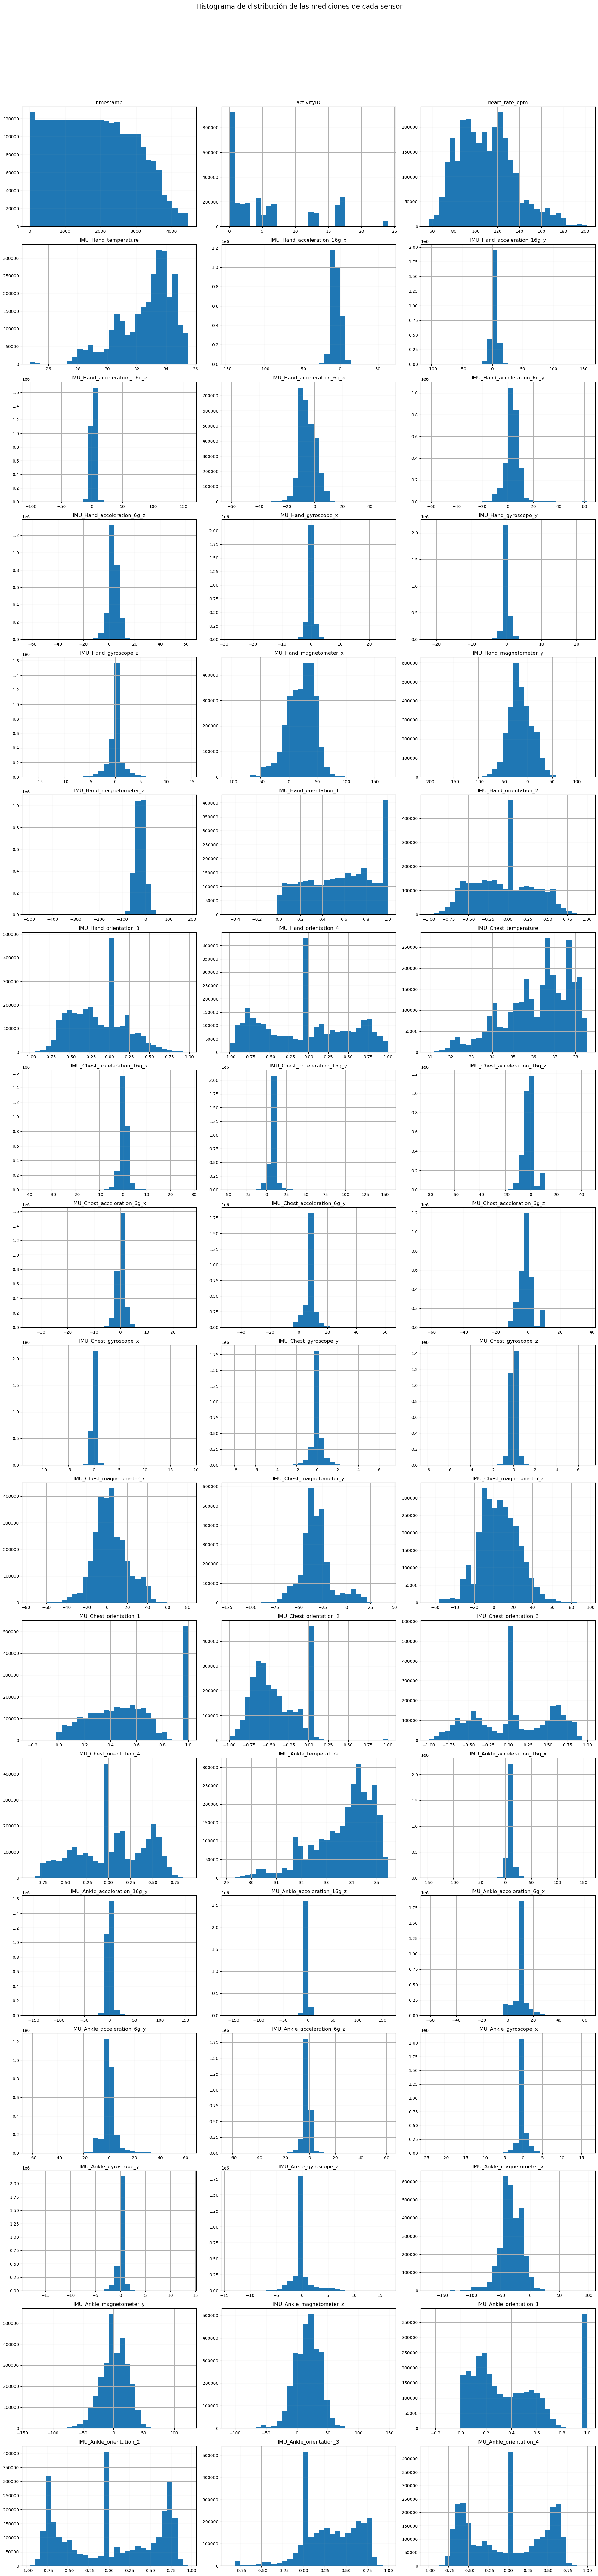

In [94]:
import math
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas y excluimos 'activityID'
pamap_numeric = pamap_no_null.select_dtypes(include=['number'])

# Calculamos cuántos atributos numéricos hay
num_attributes = pamap_numeric.shape[1]


# Máximo 3 columnas por fila
cols = 3
rows = math.ceil(num_attributes / cols)

# Aumentamos el tamaño total de la figura
plt.figure(figsize=(20, 5 * rows))

# Generar histogramas con layout y bins configurados
pamap_numeric.hist(
    bins=30,
    layout=(rows, cols),
    figsize=(20, 5 * rows)
)

plt.suptitle("Histograma de distribución de las mediciones de cada sensor", fontsize=16)

# Ajustar espaciado para que el título no se sobreponga
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## 2.9. Gráfica de densidad para los atributos

### 2.9.1. Heart rate

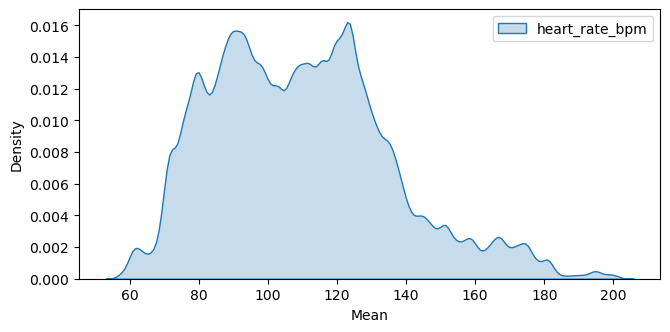

In [109]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['heart_rate_bpm'], fill=True, label='heart_rate_bpm')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.2. IMU hand temperature

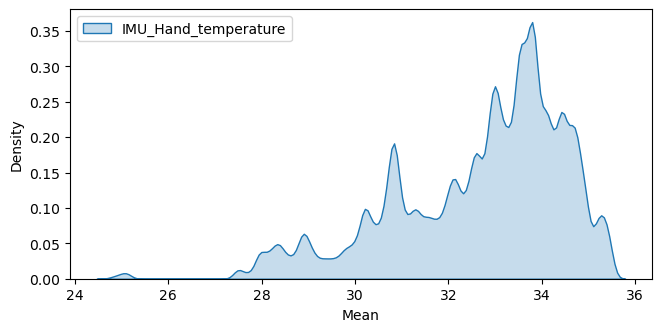

In [112]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Hand_temperature'], fill=True, label='IMU_Hand_temperature')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.3. IMU hand acceleration 16g

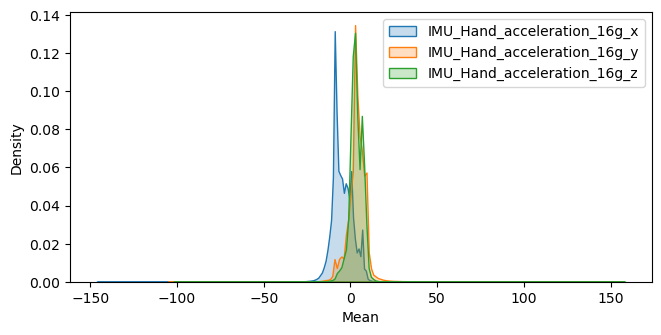

In [117]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Hand_acceleration_16g_x'], fill=True, label='IMU_Hand_acceleration_16g_x')
sns.kdeplot(pamap_no_null['IMU_Hand_acceleration_16g_y'], fill=True, label='IMU_Hand_acceleration_16g_y')
sns.kdeplot(pamap_no_null['IMU_Hand_acceleration_16g_z'], fill=True, label='IMU_Hand_acceleration_16g_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.4. IMU hand acceleration 6g

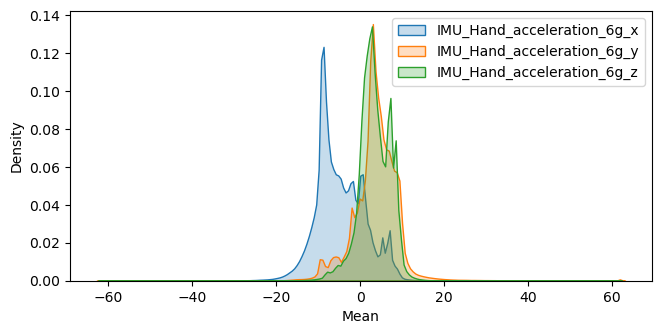

In [119]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Hand_acceleration_6g_x'], fill=True, label='IMU_Hand_acceleration_6g_x')
sns.kdeplot(pamap_no_null['IMU_Hand_acceleration_6g_y'], fill=True, label='IMU_Hand_acceleration_6g_y')
sns.kdeplot(pamap_no_null['IMU_Hand_acceleration_6g_z'], fill=True, label='IMU_Hand_acceleration_6g_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.5. IMU hand gyroscope

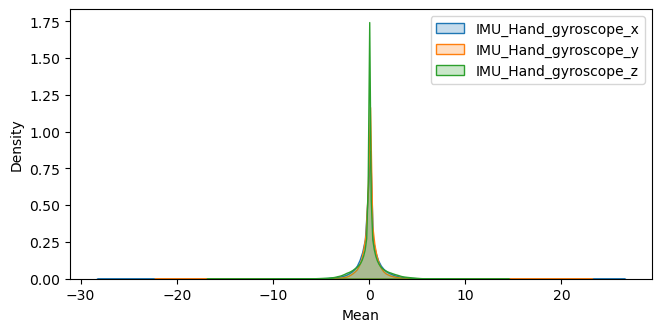

In [122]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Hand_gyroscope_x'], fill=True, label='IMU_Hand_gyroscope_x')
sns.kdeplot(pamap_no_null['IMU_Hand_gyroscope_y'], fill=True, label='IMU_Hand_gyroscope_y')
sns.kdeplot(pamap_no_null['IMU_Hand_gyroscope_z'], fill=True, label='IMU_Hand_gyroscope_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.6. IMU hand magnetometer

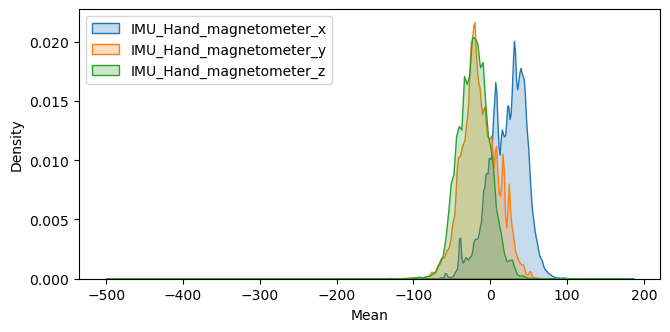

In [126]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Hand_magnetometer_x'], fill=True, label='IMU_Hand_magnetometer_x')
sns.kdeplot(pamap_no_null['IMU_Hand_magnetometer_y'], fill=True, label='IMU_Hand_magnetometer_y')
sns.kdeplot(pamap_no_null['IMU_Hand_magnetometer_z'], fill=True, label='IMU_Hand_magnetometer_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.7. IMU hand orientation

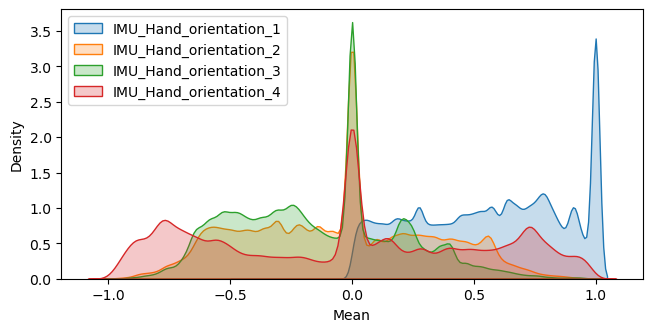

In [129]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Hand_orientation_1'], fill=True, label='IMU_Hand_orientation_1')
sns.kdeplot(pamap_no_null['IMU_Hand_orientation_2'], fill=True, label='IMU_Hand_orientation_2')
sns.kdeplot(pamap_no_null['IMU_Hand_orientation_3'], fill=True, label='IMU_Hand_orientation_3')
sns.kdeplot(pamap_no_null['IMU_Hand_orientation_4'], fill=True, label='IMU_Hand_orientation_4')

plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.8. IMU chest temperature

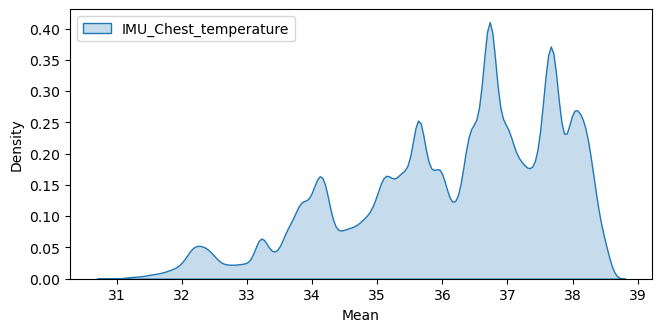

In [131]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Chest_temperature'], fill=True, label='IMU_Chest_temperature')

plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.8. IMU chest acceleration 16g

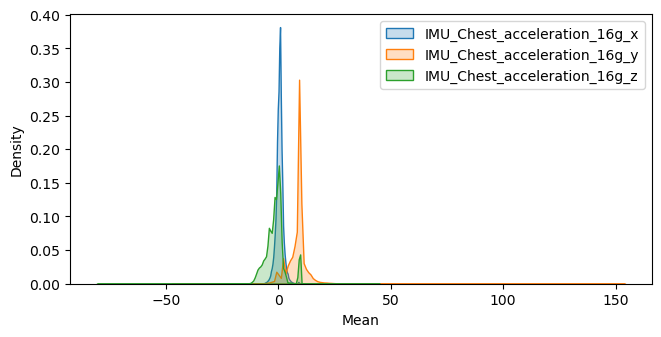

In [135]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Chest_acceleration_16g_x'], fill=True, label='IMU_Chest_acceleration_16g_x')
sns.kdeplot(pamap_no_null['IMU_Chest_acceleration_16g_y'], fill=True, label='IMU_Chest_acceleration_16g_y')
sns.kdeplot(pamap_no_null['IMU_Chest_acceleration_16g_z'], fill=True, label='IMU_Chest_acceleration_16g_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.9. IMU chest acceleration 6g

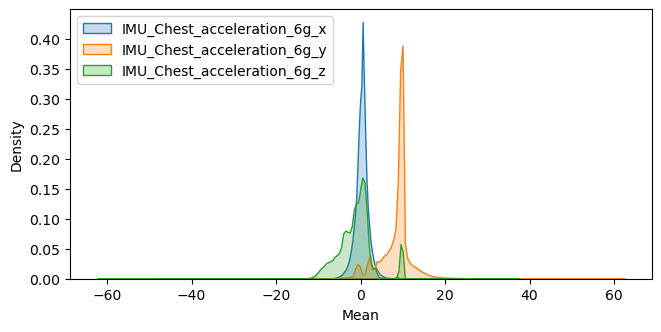

In [140]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Chest_acceleration_6g_x'], fill=True, label='IMU_Chest_acceleration_6g_x')
sns.kdeplot(pamap_no_null['IMU_Chest_acceleration_6g_y'], fill=True, label='IMU_Chest_acceleration_6g_y')
sns.kdeplot(pamap_no_null['IMU_Chest_acceleration_6g_z'], fill=True, label='IMU_Chest_acceleration_6g_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.10. IMU chest gyroscope 

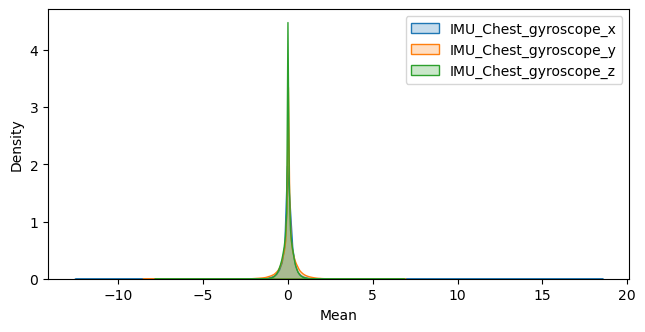

In [142]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Chest_gyroscope_x'], fill=True, label='IMU_Chest_gyroscope_x')
sns.kdeplot(pamap_no_null['IMU_Chest_gyroscope_y'], fill=True, label='IMU_Chest_gyroscope_y')
sns.kdeplot(pamap_no_null['IMU_Chest_gyroscope_z'], fill=True, label='IMU_Chest_gyroscope_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.11. IMU chest magnetometer 

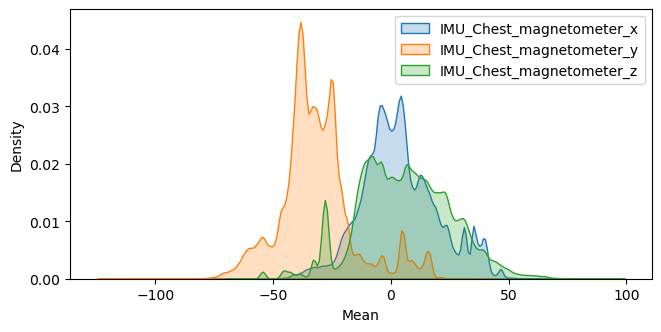

In [146]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Chest_magnetometer_x'], fill=True, label='IMU_Chest_magnetometer_x')
sns.kdeplot(pamap_no_null['IMU_Chest_magnetometer_y'], fill=True, label='IMU_Chest_magnetometer_y')
sns.kdeplot(pamap_no_null['IMU_Chest_magnetometer_z'], fill=True, label='IMU_Chest_magnetometer_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.12. IMU chest orientation 

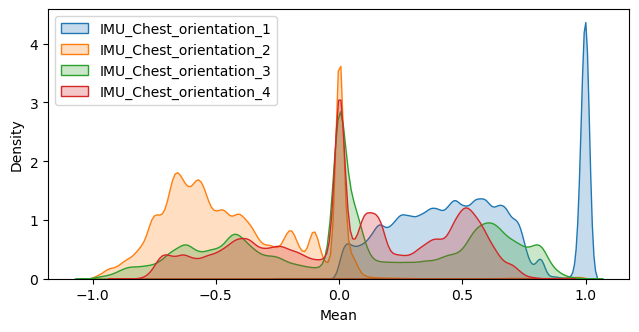

In [149]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Chest_orientation_1'], fill=True, label='IMU_Chest_orientation_1')
sns.kdeplot(pamap_no_null['IMU_Chest_orientation_2'], fill=True, label='IMU_Chest_orientation_2')
sns.kdeplot(pamap_no_null['IMU_Chest_orientation_3'], fill=True, label='IMU_Chest_orientation_3')
sns.kdeplot(pamap_no_null['IMU_Chest_orientation_4'], fill=True, label='IMU_Chest_orientation_4')

plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.13. IMU ankle temperature

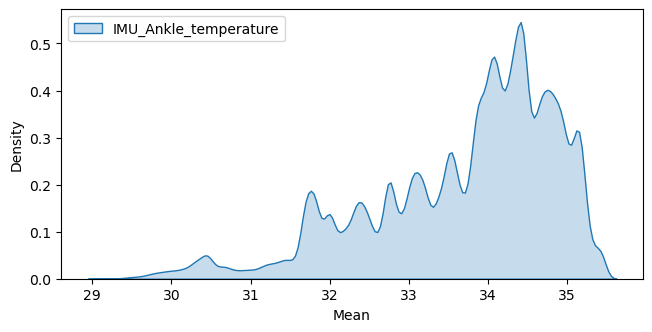

In [152]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Ankle_temperature'], fill=True, label='IMU_Ankle_temperature')

plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.14. IMU ankle acceleration 16g

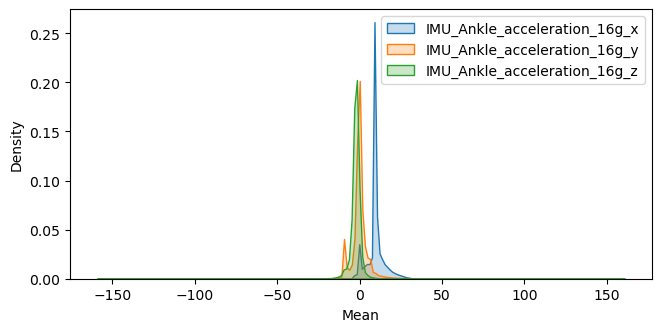

In [156]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Ankle_acceleration_16g_x'], fill=True, label='IMU_Ankle_acceleration_16g_x')
sns.kdeplot(pamap_no_null['IMU_Ankle_acceleration_16g_y'], fill=True, label='IMU_Ankle_acceleration_16g_y')
sns.kdeplot(pamap_no_null['IMU_Ankle_acceleration_16g_z'], fill=True, label='IMU_Ankle_acceleration_16g_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.15. IMU ankle acceleration 6g

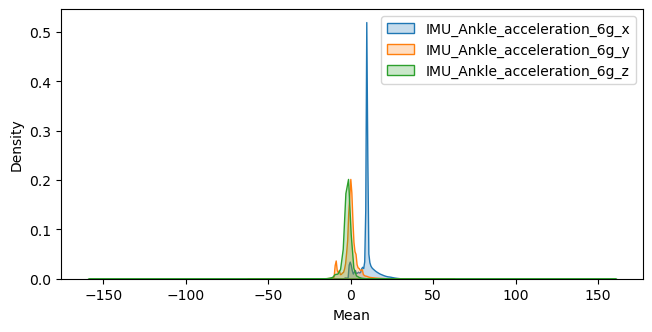

In [158]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Ankle_acceleration_6g_x'], fill=True, label='IMU_Ankle_acceleration_6g_x')
sns.kdeplot(pamap_no_null['IMU_Ankle_acceleration_6g_y'], fill=True, label='IMU_Ankle_acceleration_6g_y')
sns.kdeplot(pamap_no_null['IMU_Ankle_acceleration_16g_z'], fill=True, label='IMU_Ankle_acceleration_6g_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.16. IMU ankle gyroscope

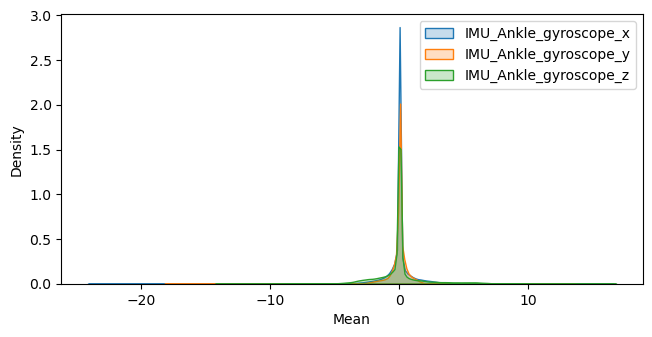

In [161]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Ankle_gyroscope_x'], fill=True, label='IMU_Ankle_gyroscope_x')
sns.kdeplot(pamap_no_null['IMU_Ankle_gyroscope_y'], fill=True, label='IMU_Ankle_gyroscope_y')
sns.kdeplot(pamap_no_null['IMU_Ankle_gyroscope_z'], fill=True, label='IMU_Ankle_gyroscope_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.17. IMU ankle magnetometer

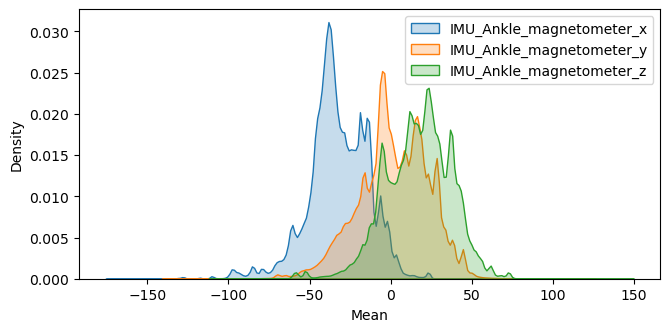

In [167]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Ankle_magnetometer_x'], fill=True, label='IMU_Ankle_magnetometer_x')
sns.kdeplot(pamap_no_null['IMU_Ankle_magnetometer_y'], fill=True, label='IMU_Ankle_magnetometer_y')
sns.kdeplot(pamap_no_null['IMU_Ankle_magnetometer_z'], fill=True, label='IMU_Ankle_magnetometer_z')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

### 2.9.18. IMU ankle orientation

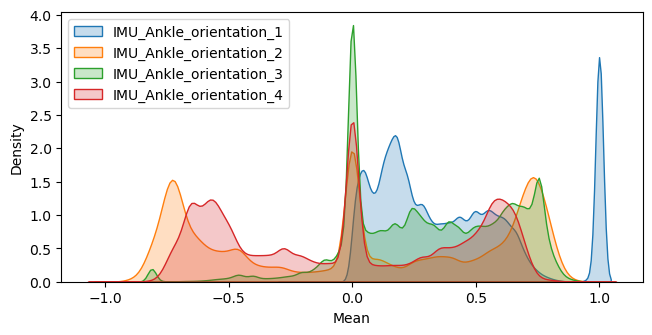

In [171]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))
sns.kdeplot(pamap_no_null['IMU_Ankle_orientation_1'], fill=True, label='IMU_Ankle_orientation_1')
sns.kdeplot(pamap_no_null['IMU_Ankle_orientation_2'], fill=True, label='IMU_Ankle_orientation_2')
sns.kdeplot(pamap_no_null['IMU_Ankle_orientation_3'], fill=True, label='IMU_Ankle_orientation_3')
sns.kdeplot(pamap_no_null['IMU_Ankle_orientation_4'], fill=True, label='IMU_Ankle_orientation_4')

plt.xlabel('Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

## 2.10. Gráfica de caja y bigotes para la distribución de los atributos. 

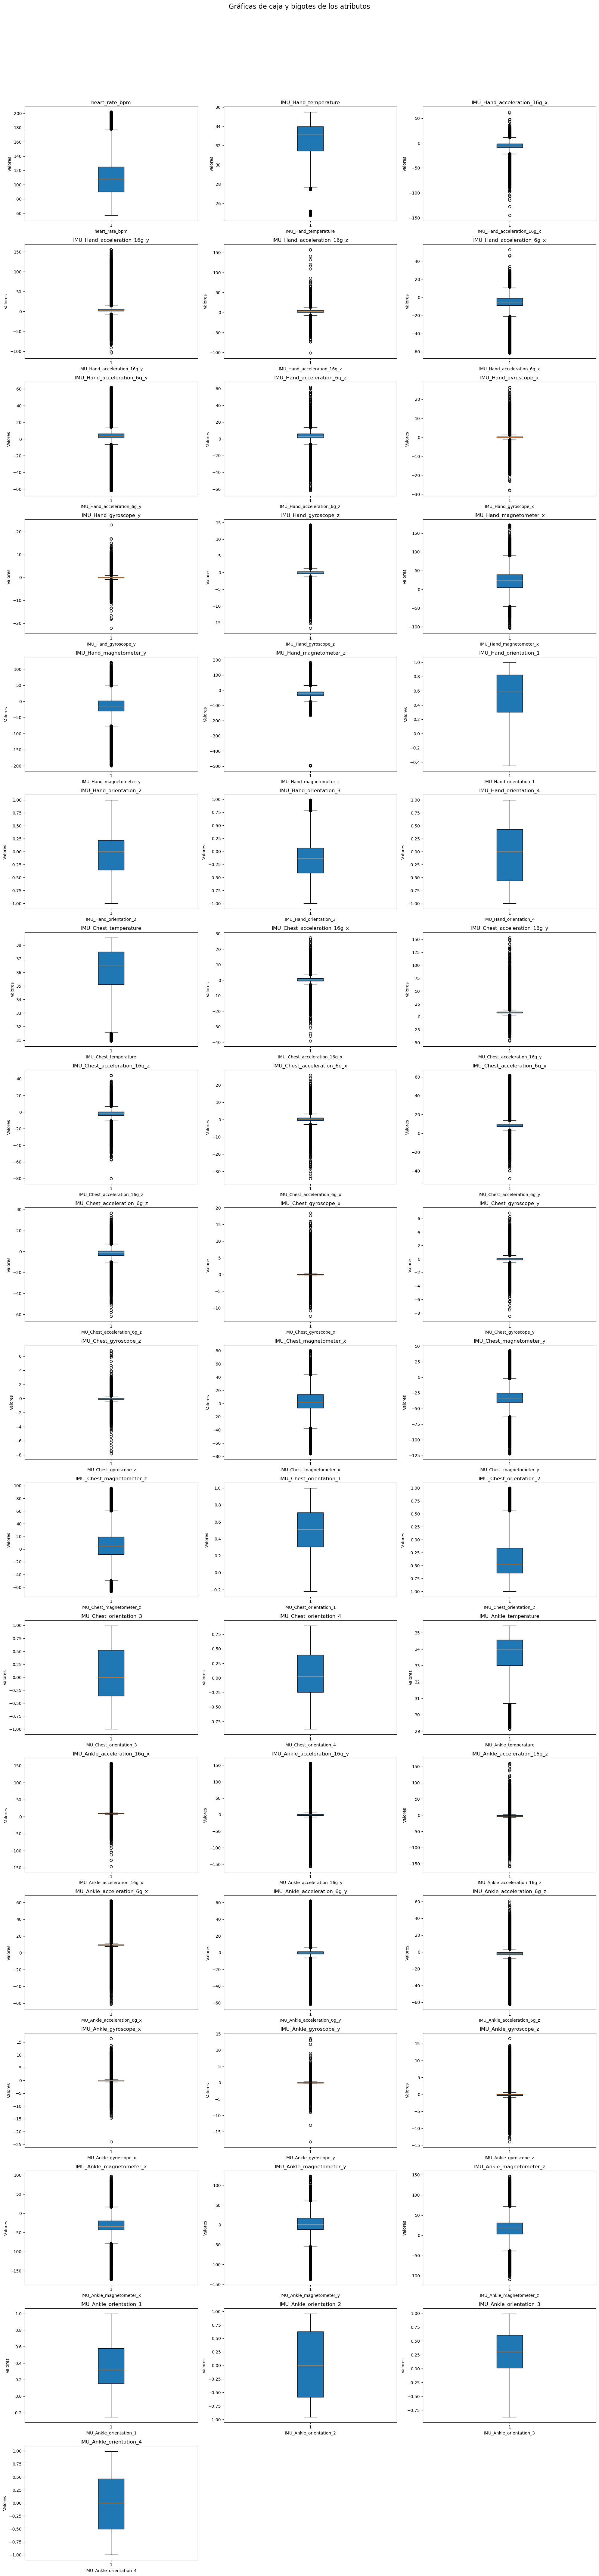

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import math

columnas_seleccionadas = [
    'heart_rate_bpm',
    'IMU_Hand_temperature',
    'IMU_Hand_acceleration_16g_x',
    'IMU_Hand_acceleration_16g_y',
    'IMU_Hand_acceleration_16g_z',
    'IMU_Hand_acceleration_6g_x',
    'IMU_Hand_acceleration_6g_y',
    'IMU_Hand_acceleration_6g_z',
    'IMU_Hand_gyroscope_x',
    'IMU_Hand_gyroscope_y',
    'IMU_Hand_gyroscope_z',
    'IMU_Hand_magnetometer_x',
    'IMU_Hand_magnetometer_y',
    'IMU_Hand_magnetometer_z',
    'IMU_Hand_orientation_1',
    'IMU_Hand_orientation_2',
    'IMU_Hand_orientation_3',
    'IMU_Hand_orientation_4',
    'IMU_Chest_temperature',
    'IMU_Chest_acceleration_16g_x',
    'IMU_Chest_acceleration_16g_y',
    'IMU_Chest_acceleration_16g_z',
    'IMU_Chest_acceleration_6g_x',
    'IMU_Chest_acceleration_6g_y',
    'IMU_Chest_acceleration_6g_z',
    'IMU_Chest_gyroscope_x',
    'IMU_Chest_gyroscope_y',
    'IMU_Chest_gyroscope_z',
    'IMU_Chest_magnetometer_x',
    'IMU_Chest_magnetometer_y',
    'IMU_Chest_magnetometer_z',
    'IMU_Chest_orientation_1',
    'IMU_Chest_orientation_2',
    'IMU_Chest_orientation_3',
    'IMU_Chest_orientation_4',
    'IMU_Ankle_temperature',
    'IMU_Ankle_acceleration_16g_x',
    'IMU_Ankle_acceleration_16g_y',
    'IMU_Ankle_acceleration_16g_z',
    'IMU_Ankle_acceleration_6g_x',
    'IMU_Ankle_acceleration_6g_y',
    'IMU_Ankle_acceleration_6g_z',
    'IMU_Ankle_gyroscope_x',
    'IMU_Ankle_gyroscope_y',
    'IMU_Ankle_gyroscope_z',
    'IMU_Ankle_magnetometer_x',
    'IMU_Ankle_magnetometer_y',
    'IMU_Ankle_magnetometer_z',
    'IMU_Ankle_orientation_1',
    'IMU_Ankle_orientation_2',
    'IMU_Ankle_orientation_3',
    'IMU_Ankle_orientation_4'
]

df_numeric = pamap_no_null[columnas_seleccionadas]

num_attributes = df_numeric.shape[1]

cols = 3
rows = math.ceil(num_attributes / cols)

plt.figure(figsize=(20, 5 * rows))

for i, col in enumerate(df_numeric.columns):
    ax = plt.subplot(rows, cols, i + 1)
    ax.boxplot(df_numeric[col].dropna(), vert=True, patch_artist=True)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Valores")

plt.suptitle("Gráficas de caja y bigotes de los atributos", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2.11. Matriz de correlación de los atributos

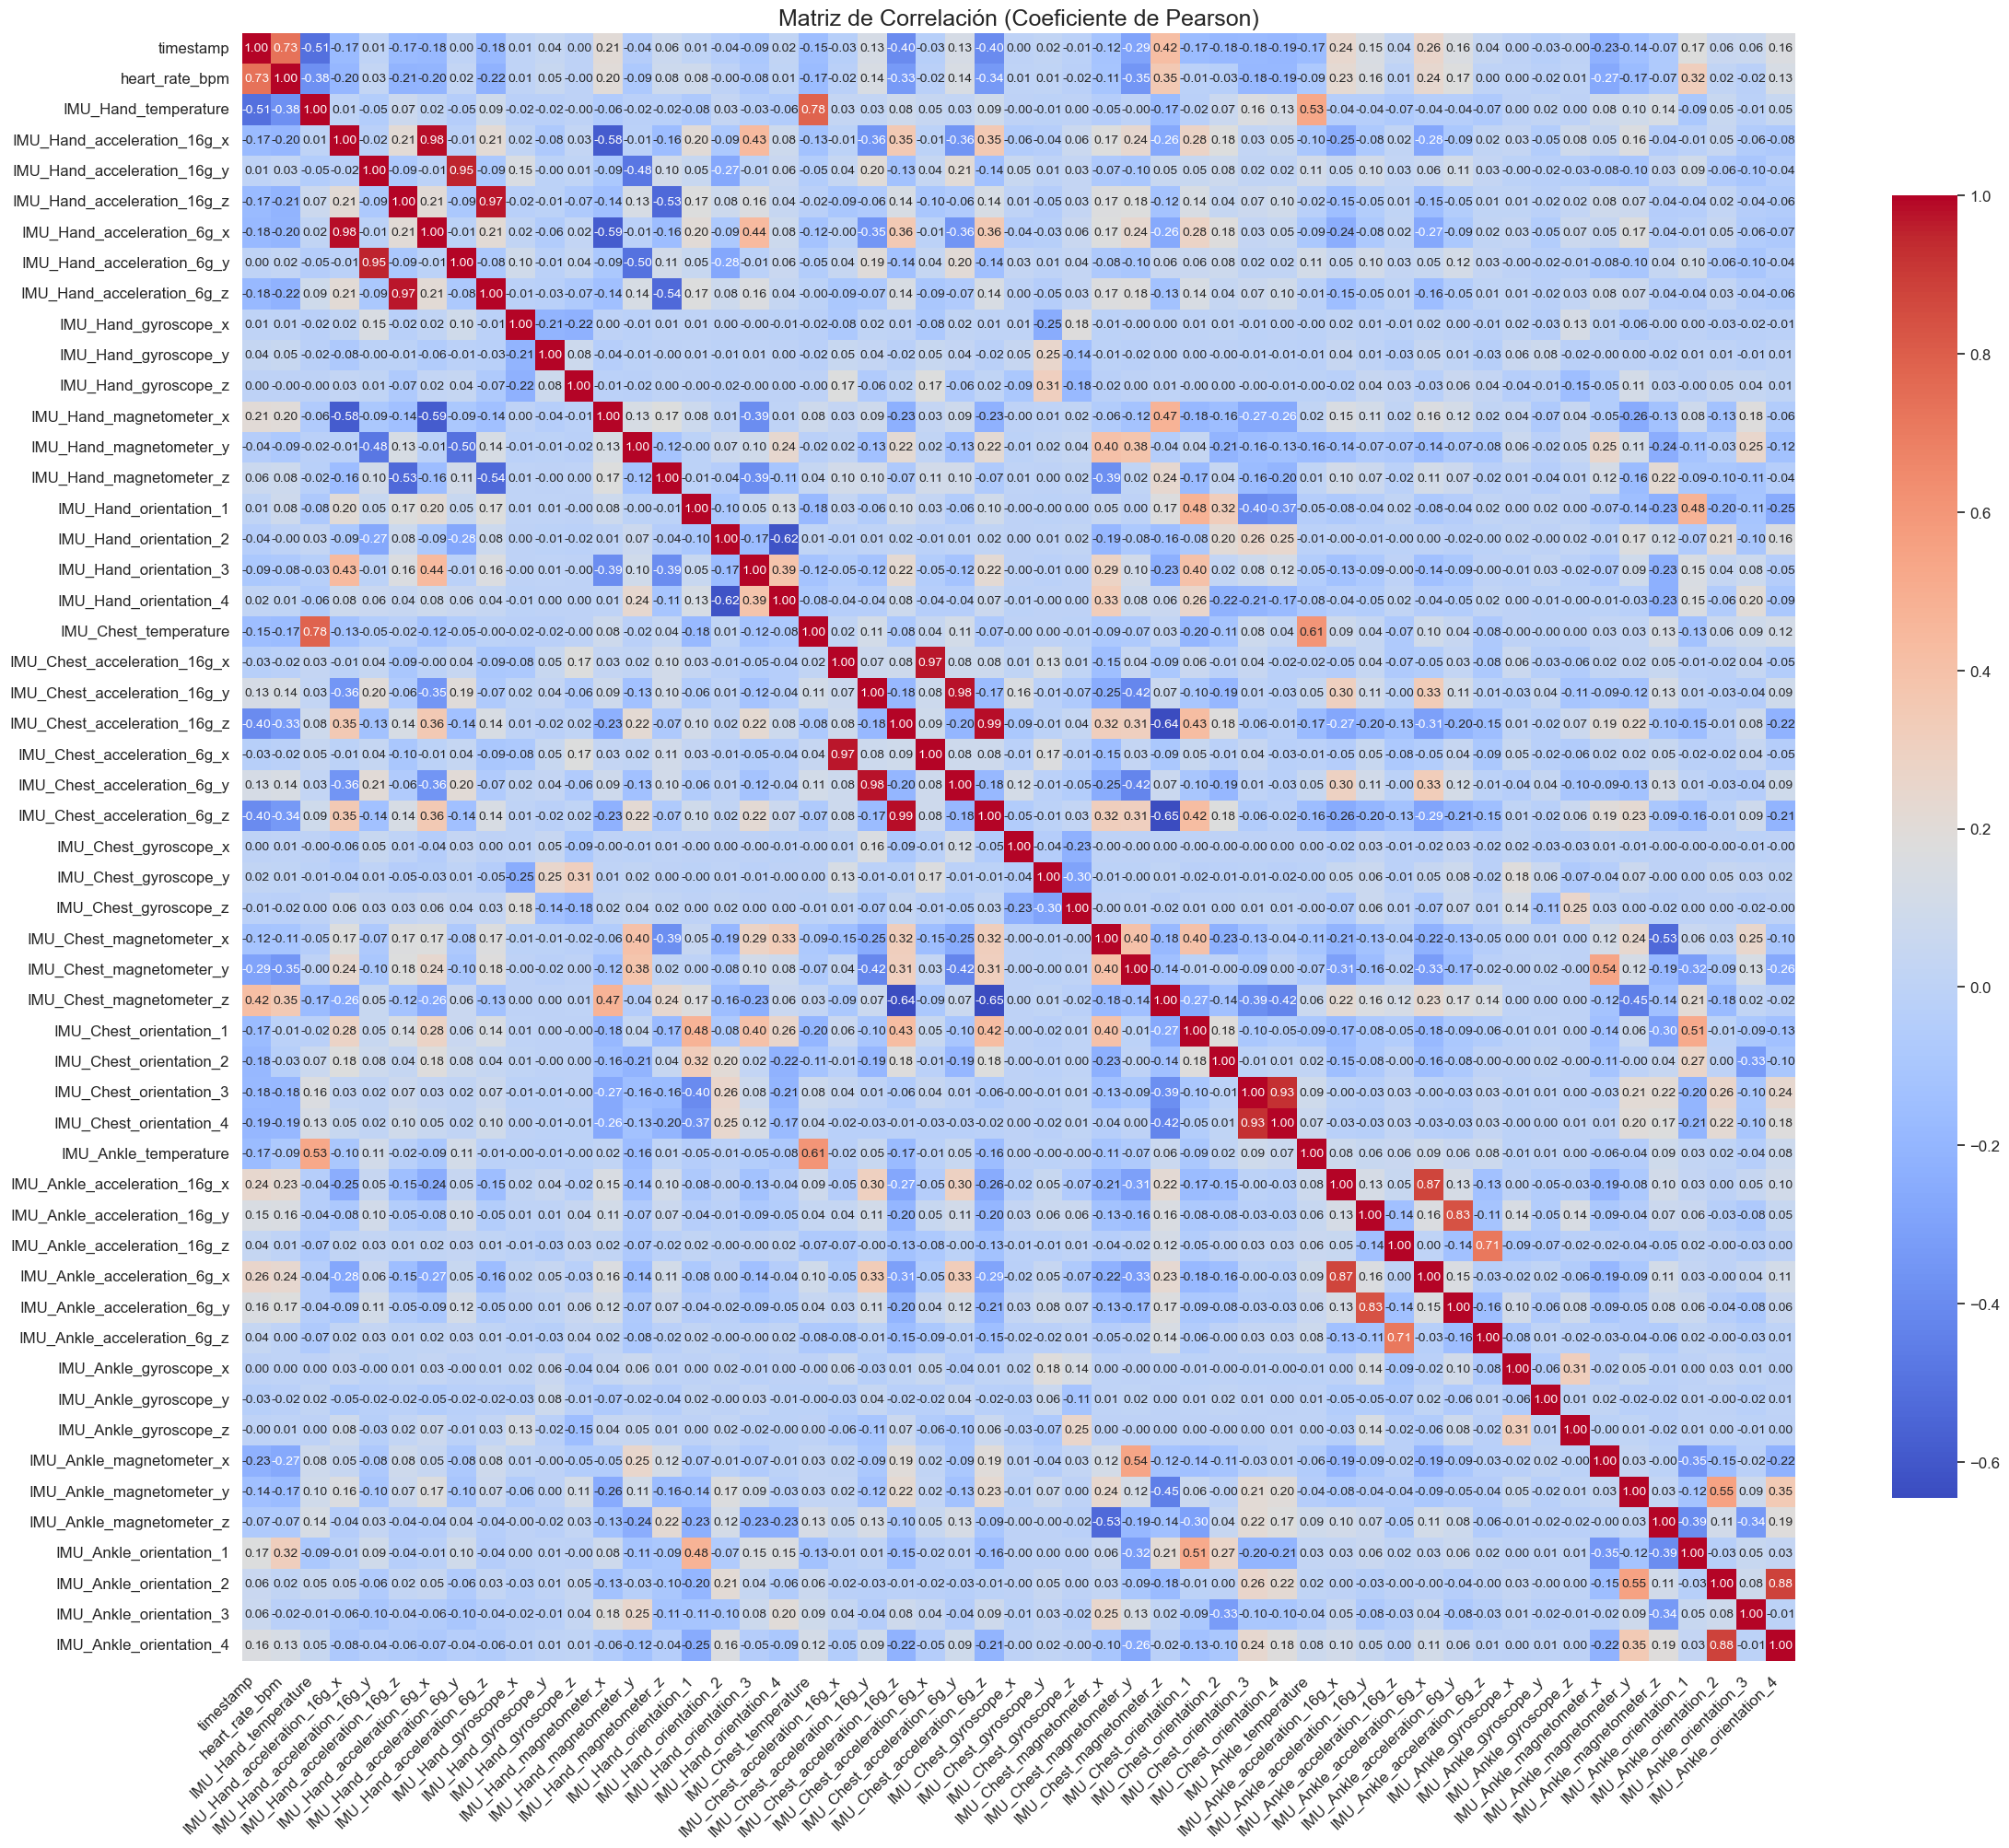

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.1)

plt.figure(figsize=(24, 20))

# Generar el heatmap
sns.heatmap(
    pamap_corr_matrix,
    annot=True,         # Mostrar valores numéricos
    fmt=".2f",          # Formato de 2 decimales
    cmap="coolwarm",
    annot_kws={"size": 10},  # Tamaño de fuente de los valores dentro de las celdas
    square=False,       
    cbar_kws={"shrink": 0.8} # Ajusta el tamaño de la barra de color
)

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajusta automáticamente los márgenes
plt.tight_layout()

plt.title('Matriz de Correlación (Coeficiente de Pearson)', fontsize=18)
plt.show()

Observando la matriz de correlación notamos que hay varias características correlacionadas, pero nos gustaría saber puntualmente cuáles son. A continuación se obtienen las que tengan un índice de correlación superior a 0.8 (alta correlación): 

In [84]:
import numpy as np

threshold = 0.8
high_corr_pairs = []

for i in range(len(pamap_corr_matrix.columns)):
    for j in range(i+1, len(pamap_corr_matrix.columns)):
        corr_value = pamap_corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((pamap_corr_matrix.columns[i], pamap_corr_matrix.columns[j], corr_value))

for col1, col2, corr_value in high_corr_pairs:
    print(f"Las columnas '{col1}' y '{col2}' tienen una correlación de {corr_value:.2f}")


Las columnas 'IMU_Hand_acceleration_16g_x' y 'IMU_Hand_acceleration_6g_x' tienen una correlación de 0.98
Las columnas 'IMU_Hand_acceleration_16g_y' y 'IMU_Hand_acceleration_6g_y' tienen una correlación de 0.95
Las columnas 'IMU_Hand_acceleration_16g_z' y 'IMU_Hand_acceleration_6g_z' tienen una correlación de 0.97
Las columnas 'IMU_Chest_acceleration_16g_x' y 'IMU_Chest_acceleration_6g_x' tienen una correlación de 0.97
Las columnas 'IMU_Chest_acceleration_16g_y' y 'IMU_Chest_acceleration_6g_y' tienen una correlación de 0.98
Las columnas 'IMU_Chest_acceleration_16g_z' y 'IMU_Chest_acceleration_6g_z' tienen una correlación de 0.99
Las columnas 'IMU_Chest_orientation_3' y 'IMU_Chest_orientation_4' tienen una correlación de 0.93
Las columnas 'IMU_Ankle_acceleration_16g_x' y 'IMU_Ankle_acceleration_6g_x' tienen una correlación de 0.88
Las columnas 'IMU_Ankle_acceleration_16g_y' y 'IMU_Ankle_acceleration_6g_y' tienen una correlación de 0.83
Las columnas 'IMU_Ankle_orientation_2' y 'IMU_Ankle_

La presencia de columnas altamente correlacionadas incrementa la dimensionalidad del conjunto de datos, lo que eleva el costo computacional e introduce redundancias. Esto puede sesgar la clasificación, ya que una misma característica se cuenta varias veces, otorgándole un impacto desproporcionado en comparación con las demás. Es por esto que eliminamos las características correlacionadas. 

In [86]:
pamap_remove_redundant = pamap_data.copy()

columns_to_remove = [
    # Pares IMU_Hand: se eliminan las de 16g para dejar las de 6g
    "IMU_Hand_acceleration_16g_x",
    "IMU_Hand_acceleration_16g_y",
    "IMU_Hand_acceleration_16g_z",
    
    # Pares IMU_Chest: se eliminan las de 16g para dejar las de 6g
    "IMU_Chest_acceleration_16g_x",
    "IMU_Chest_acceleration_16g_y",
    "IMU_Chest_acceleration_16g_z",
    
    # Pares de orientación en el pecho: se elimina una de las dos columnas
    "IMU_Chest_orientation_4",  # se decide conservar 'IMU_Chest_orientation_3'
    
    # Pares IMU_Ankle: se eliminan las de 16g para las aceleraciones
    "IMU_Ankle_acceleration_16g_x",
    "IMU_Ankle_acceleration_16g_y",
    
    # Pares de orientación en el tobillo: se elimina una de las dos columnas
    "IMU_Ankle_orientation_2"   # se decide conservar 'IMU_Ankle_orientation_4'
]

pamap_remove_redundant.drop(columns=columns_to_remove, inplace=True)